### Kaggle Data

In [ ]:
# Install Kaggle
!pip install -q kaggle
!kaggle datasets download -d alessiocorrado99/animals10
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [ ]:
# translate.py dictionary for easier access
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

### Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
size_param = 64

In [ ]:
# preprocess
img_size = (size_param, size_param)
animals_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "raw-img",
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=32,
    shuffle=True
)

# split data 70/15/15
total = len(animals_dataset)
train_batches = int(0.7 * total)
validation_batches = int(0.15 * total)
test_batches = total - train_batches - validation_batches

training_data = animals_dataset.take(train_batches)
remaining = animals_dataset.skip(train_batches)
validation_data = remaining.take(validation_batches)
test_data = remaining.skip(validation_batches)


Found 26179 files belonging to 10 classes.


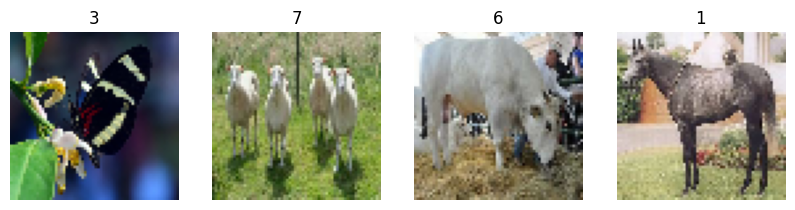

In [ ]:
import matplotlib.pyplot as plt
# see how pictures look
def show_images(dataset, n_images):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_images):
            ax = plt.subplot(1, n_images, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")
    plt.show()

show_images(animals_dataset, 4)


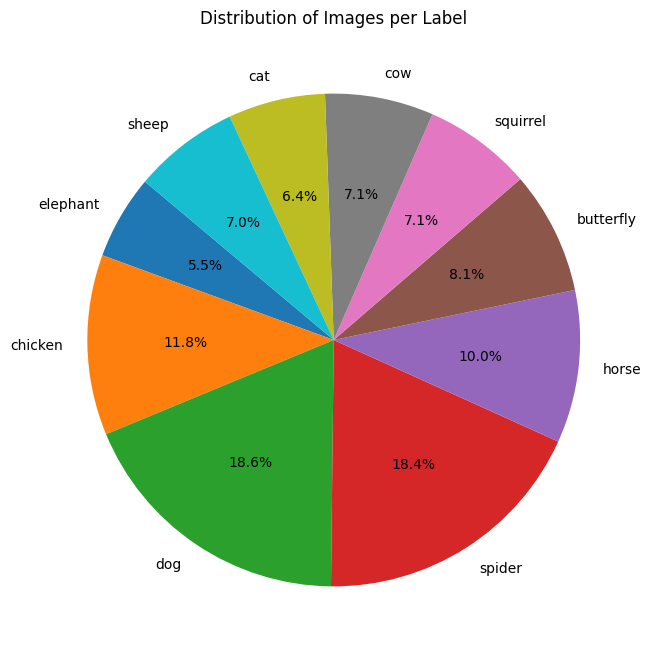

In [ ]:
import tensorflow as tf
from collections import defaultdict

# Function to count labels
def count_labels(dataset):
    label_count = defaultdict(int)
    for images, labels in dataset.unbatch().as_numpy_iterator():
        label_count[labels] += 1
    return label_count

# Count labels in the full dataset
label_counts = count_labels(animals_dataset)

labels = list(label_counts.keys())
counts = list(label_counts.values())

labels = [translate[animals_dataset.class_names[label]] for label in labels]

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images per Label')
plt.show()


# Model 1

Neural Network Demo

In [ ]:
cnn1 = tf.keras.models.Sequential() #initializing the CNN
cnn1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding = "same", input_shape=[size_param, size_param, 3])) #Convolution 1
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
cnn1.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn1.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3
cnn1.add(tf.keras.layers.Flatten()) #Flaterning
cnn1.add(tf.keras.layers.Dense(units=128, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)
cnn1.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection2
tf.keras.layers.Dropout(0.5)
cnn1.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

cnn1.summary()

cnn1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        9472      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)      

In [ ]:
history = cnn1.fit(training_data, batch_size = 100, epochs=10, validation_data=validation_data)

Epoch 1/10
573/573 [==============================] - 1254s 2s/step - loss: 2.4814 - accuracy: 0.2468 - val_loss: 1.9220 - val_accuracy: 0.3332
Epoch 2/10
573/573 [==============================] - 1217s 2s/step - loss: 1.8819 - accuracy: 0.3440 - val_loss: 1.7338 - val_accuracy: 0.4034
Epoch 3/10
573/573 [==============================] - 1211s 2s/step - loss: 1.6787 - accuracy: 0.4197 - val_loss: 1.6653 - val_accuracy: 0.4416
Epoch 4/10
573/573 [==============================] - 1269s 2s/step - loss: 1.5282 - accuracy: 0.4727 - val_loss: 1.5540 - val_accuracy: 0.4711
Epoch 5/10
573/573 [==============================] - 1265s 2s/step - loss: 1.3718 - accuracy: 0.5272 - val_loss: 1.4492 - val_accuracy: 0.5049
Epoch 6/10
573/573 [==============================] - 1313s 2s/step - loss: 1.2334 - accuracy: 0.5773 - val_loss: 1.4493 - val_accuracy: 0.5074
Epoch 7/10
573/573 [==============================] - 1352s 2s/step - loss: 1.0961 - accuracy: 0.6219 - val_loss: 1.5059 - val_accuracy:

In [ ]:
cnn1.save('cnn1')

# Model 2

In [ ]:
cnn2 = tf.keras.models.Sequential() #initializing the CNN
cnn2.add(tf.keras.layers.SeparableConv2D(filters=64, kernel_size=7, activation="relu", padding = "same", input_shape=[size_param, size_param, 3])) #Convolution 1
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
cnn2.add(tf.keras.layers.SeparableConv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.SeparableConv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
cnn2.add(tf.keras.layers.SeparableConv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.SeparableConv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3
cnn2.add(tf.keras.layers.Flatten()) #Flaterning
cnn2.add(tf.keras.layers.Dense(units=128, activation="relu"))#Full Connection1
cnn2.add(tf.keras.layers.Dropout(0.5))
cnn2.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection2
cnn2.add(tf.keras.layers.Dropout(0.5))
cnn2.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

cnn2.summary()

cnn2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_5 (Separa  (None, 64, 64, 64)        403       
 bleConv2D)                                                      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_6 (Separa  (None, 32, 32, 128)       8896      
 bleConv2D)                                                      
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 separable_conv2d_7 (Separa  (None, 32, 32, 128)      

In [ ]:
history = cnn2.fit(training_data, epochs=10, validation_data=validation_data)

Epoch 1/10
573/573 [==============================] - 459s 797ms/step - loss: 2.0869 - accuracy: 0.2652 - val_loss: 1.9550 - val_accuracy: 0.3852
Epoch 2/10
573/573 [==============================] - 442s 771ms/step - loss: 1.8172 - accuracy: 0.3785 - val_loss: 1.5823 - val_accuracy: 0.4698
Epoch 3/10
573/573 [==============================] - 445s 776ms/step - loss: 1.6381 - accuracy: 0.4337 - val_loss: 1.6553 - val_accuracy: 0.4413
Epoch 4/10
573/573 [==============================] - 451s 786ms/step - loss: 1.5477 - accuracy: 0.4641 - val_loss: 1.4335 - val_accuracy: 0.4859
Epoch 5/10
573/573 [==============================] - 448s 782ms/step - loss: 1.4646 - accuracy: 0.4939 - val_loss: 1.3961 - val_accuracy: 0.5113
Epoch 6/10
573/573 [==============================] - 447s 780ms/step - loss: 1.3904 - accuracy: 0.5151 - val_loss: 1.3897 - val_accuracy: 0.5149
Epoch 7/10
573/573 [==============================] - 440s 767ms/step - loss: 1.3307 - accuracy: 0.5366 - val_loss: 1.4506 -

In [ ]:
cnn2.save('cnn2')

# Model 3

In [ ]:
cnn3 = tf.keras.models.Sequential() #initializing the CNN
cnn3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding = "same", input_shape=[size_param, size_param, 3])) #Convolution 1
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
cnn3.add(tf.keras.layers.BatchNormalization())

cnn3.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, activation="relu", padding = "same")) #Convolution 2
cnn3.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, activation="relu", padding = "same")) #Convolution 3
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2

cnn3.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3

cnn3.add(tf.keras.layers.Flatten()) #Flaterning

cnn3.add(tf.keras.layers.Dense(units=512, activation="relu"))#Full Connection1
cnn3.add(tf.keras.layers.Dropout(0.5))

cnn3.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

cnn3.summary()

cnn3.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       65664     
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       262272    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 128)      

In [ ]:
history = cnn3.fit(training_data, epochs=10, validation_data=validation_data)

Epoch 1/10
573/573 [==============================] - 1202s 2s/step - loss: 1.8235 - accuracy: 0.3691 - val_loss: 1.5166 - val_accuracy: 0.4928
Epoch 2/10
573/573 [==============================] - 1195s 2s/step - loss: 1.4117 - accuracy: 0.5170 - val_loss: 1.3239 - val_accuracy: 0.5538
Epoch 3/10
573/573 [==============================] - 1194s 2s/step - loss: 1.2159 - accuracy: 0.5844 - val_loss: 1.2802 - val_accuracy: 0.5704
Epoch 4/10
573/573 [==============================] - 1196s 2s/step - loss: 1.0839 - accuracy: 0.6291 - val_loss: 1.3235 - val_accuracy: 0.5638
Epoch 5/10
573/573 [==============================] - 1207s 2s/step - loss: 0.9599 - accuracy: 0.6760 - val_loss: 1.3383 - val_accuracy: 0.5733
Epoch 6/10
573/573 [==============================] - 1205s 2s/step - loss: 0.8394 - accuracy: 0.7106 - val_loss: 1.1655 - val_accuracy: 0.6345
Epoch 7/10
573/573 [==============================] - 1196s 2s/step - loss: 0.7132 - accuracy: 0.7559 - val_loss: 1.2606 - val_accuracy:

In [ ]:
cnn3.save('cnn3')

# Evaluation

In [ ]:
test_loss1, test_accuracy1 = cnn1.evaluate(test_data)
test_loss2, test_accuracy2 = cnn2.evaluate(test_data)
test_loss3, test_accuracy3 = cnn3.evaluate(test_data)

print("Model 1: Accuracy = {:.2f}%, Loss = {:.4f}".format(test_accuracy1 * 100, test_loss1))
print("Model 2: Accuracy = {:.2f}%, Loss = {:.4f}".format(test_accuracy2 * 100, test_loss2))
print("Model 3: Accuracy = {:.2f}%, Loss = {:.4f}".format(test_accuracy3 * 100, test_loss3))


124/124 [==============================] - 77s 479ms/step - loss: 1.4784 - accuracy: 0.6458
Model 1: Accuracy = 51.87%, Loss = 1.9697
Model 2: Accuracy = 60.07%, Loss = 1.1857
Model 3: Accuracy = 64.58%, Loss = 1.4784


# Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

true_labels = np.concatenate([y for x, y in test_data], axis=0)

predictions1 = cnn1.predict(test_data)
predicted_labels1 = np.argmax(predictions1, axis=1)
print("CNN 1 Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels1))
print("CNN 1 Classification Report:")
print(classification_report(true_labels, predicted_labels1))

predictions2 = cnn2.predict(test_data)
predicted_labels2 = np.argmax(predictions2, axis=1)
print("CNN 2 Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels2))
print("CNN 2 Classification Report:")
print(classification_report(true_labels, predicted_labels2))

predictions3 = cnn3.predict(test_data)
predicted_labels3 = np.argmax(predictions3, axis=1)
print("CNN 3 Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels3))
print("CNN 3 Classification Report:")
print(classification_report(true_labels, predicted_labels3))

124/124 [==============================] - 89s 592ms/step
CNN 1 Confusion Matrix:
[[143  58  25  51 114  35  40  37 169  29]
 [ 81  38  14  29  51  21  21  19  92  23]
 [ 49  11  11  22  33   8  17   7  53   5]
 [ 68  21  16  24  45  13  20  18  88  10]
 [ 97  28  21  32  60  22  32  22 122  27]
 [ 47  20   5  18  39  15  17  12  60   7]
 [ 58  19  16  20  47  16  15  16  60  12]
 [ 63  33  18  23  51  12  19  13  59  12]
 [145  50  37  70 127  22  44  41 176  32]
 [ 53  25   6  12  50   9  21  12  79  14]]
CNN 1 Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.20      0.19       701
           1       0.13      0.10      0.11       389
           2       0.07      0.05      0.06       216
           3       0.08      0.07      0.08       323
           4       0.10      0.13      0.11       463
           5       0.09      0.06      0.07       240
           6       0.06      0.05      0.06       279
           7       0.07  

# F1

In [ ]:
from sklearn.metrics import f1_score

f1_score1 = f1_score(true_labels, predicted_labels1, average='weighted')
f1_score2 = f1_score(true_labels, predicted_labels2, average='weighted')
f1_score3 = f1_score(true_labels, predicted_labels3, average='weighted')

print("Model 1 F1 Score: {:.4f}".format(f1_score1))
print("Model 2 F1 Score: {:.4f}".format(f1_score2))
print("Model 3 F1 Score: {:.4f}".format(f1_score3))

Model 1 F1 Score: 0.1231
Model 2 F1 Score: 0.1268
Model 3 F1 Score: 0.1226


# Downloading Models created

In [ ]:
!zip -r /content/savedModels.zip /content/savedModels

  adding: content/savedModels/ (stored 0%)
  adding: content/savedModels/cnn2/ (stored 0%)
  adding: content/savedModels/cnn2/assets/ (stored 0%)
  adding: content/savedModels/cnn2/fingerprint.pb (stored 0%)
  adding: content/savedModels/cnn2/variables/ (stored 0%)
  adding: content/savedModels/cnn2/variables/variables.index (deflated 71%)
  adding: content/savedModels/cnn2/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/savedModels/cnn2/saved_model.pb (deflated 89%)
  adding: content/savedModels/cnn2/keras_metadata.pb (deflated 94%)
  adding: content/savedModels/cnn1/ (stored 0%)
  adding: content/savedModels/cnn1/assets/ (stored 0%)
  adding: content/savedModels/cnn1/fingerprint.pb (stored 0%)
  adding: content/savedModels/cnn1/variables/ (stored 0%)
  adding: content/savedModels/cnn1/variables/variables.index (deflated 67%)
  adding: content/savedModels/cnn1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/savedModels/cnn1/saved_model.p

In [ ]:
from google.colab import files
files.download("/content/savedModels.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>